In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
#spec_file = sorted(glob.glob("*grpspec.fits"))
#spec = Spectrum(spec_file[0])

spec = Spectrum(glob.glob("*PN9*cash.fits")[0],backFile=glob.glob("*PN9*spec_bkg.fits")[0],respFile=glob.glob("*PN9*.rmf")[0],arfFile=glob.glob("*PN9*.arf")[0])



1 spectrum  in use
 
Spectral Data File: 0886071001_PN9spec_cash.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.444e-03 +/- 7.442e-04 (50.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-680
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.756e+04 sec
 Using fit statistic: cstat
 Using Background File                0886071001_PN9spec_bkg.fits
  Background Exposure Time: 1.756e+04 sec
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Net count rate (cts/s) for Spectrum:1  4.444e-03 +/- 7.442e-04 (50.0 % total)
***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.
Response successfully loaded.
Arf successfully loaded.
Spectrum 1  Spectral Data File: 0886071001_PN9spec_cash.fits
Net count rate (cts/s) for Spectrum:1  4.444e-03 +/- 7.442e-04 (50.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Ch

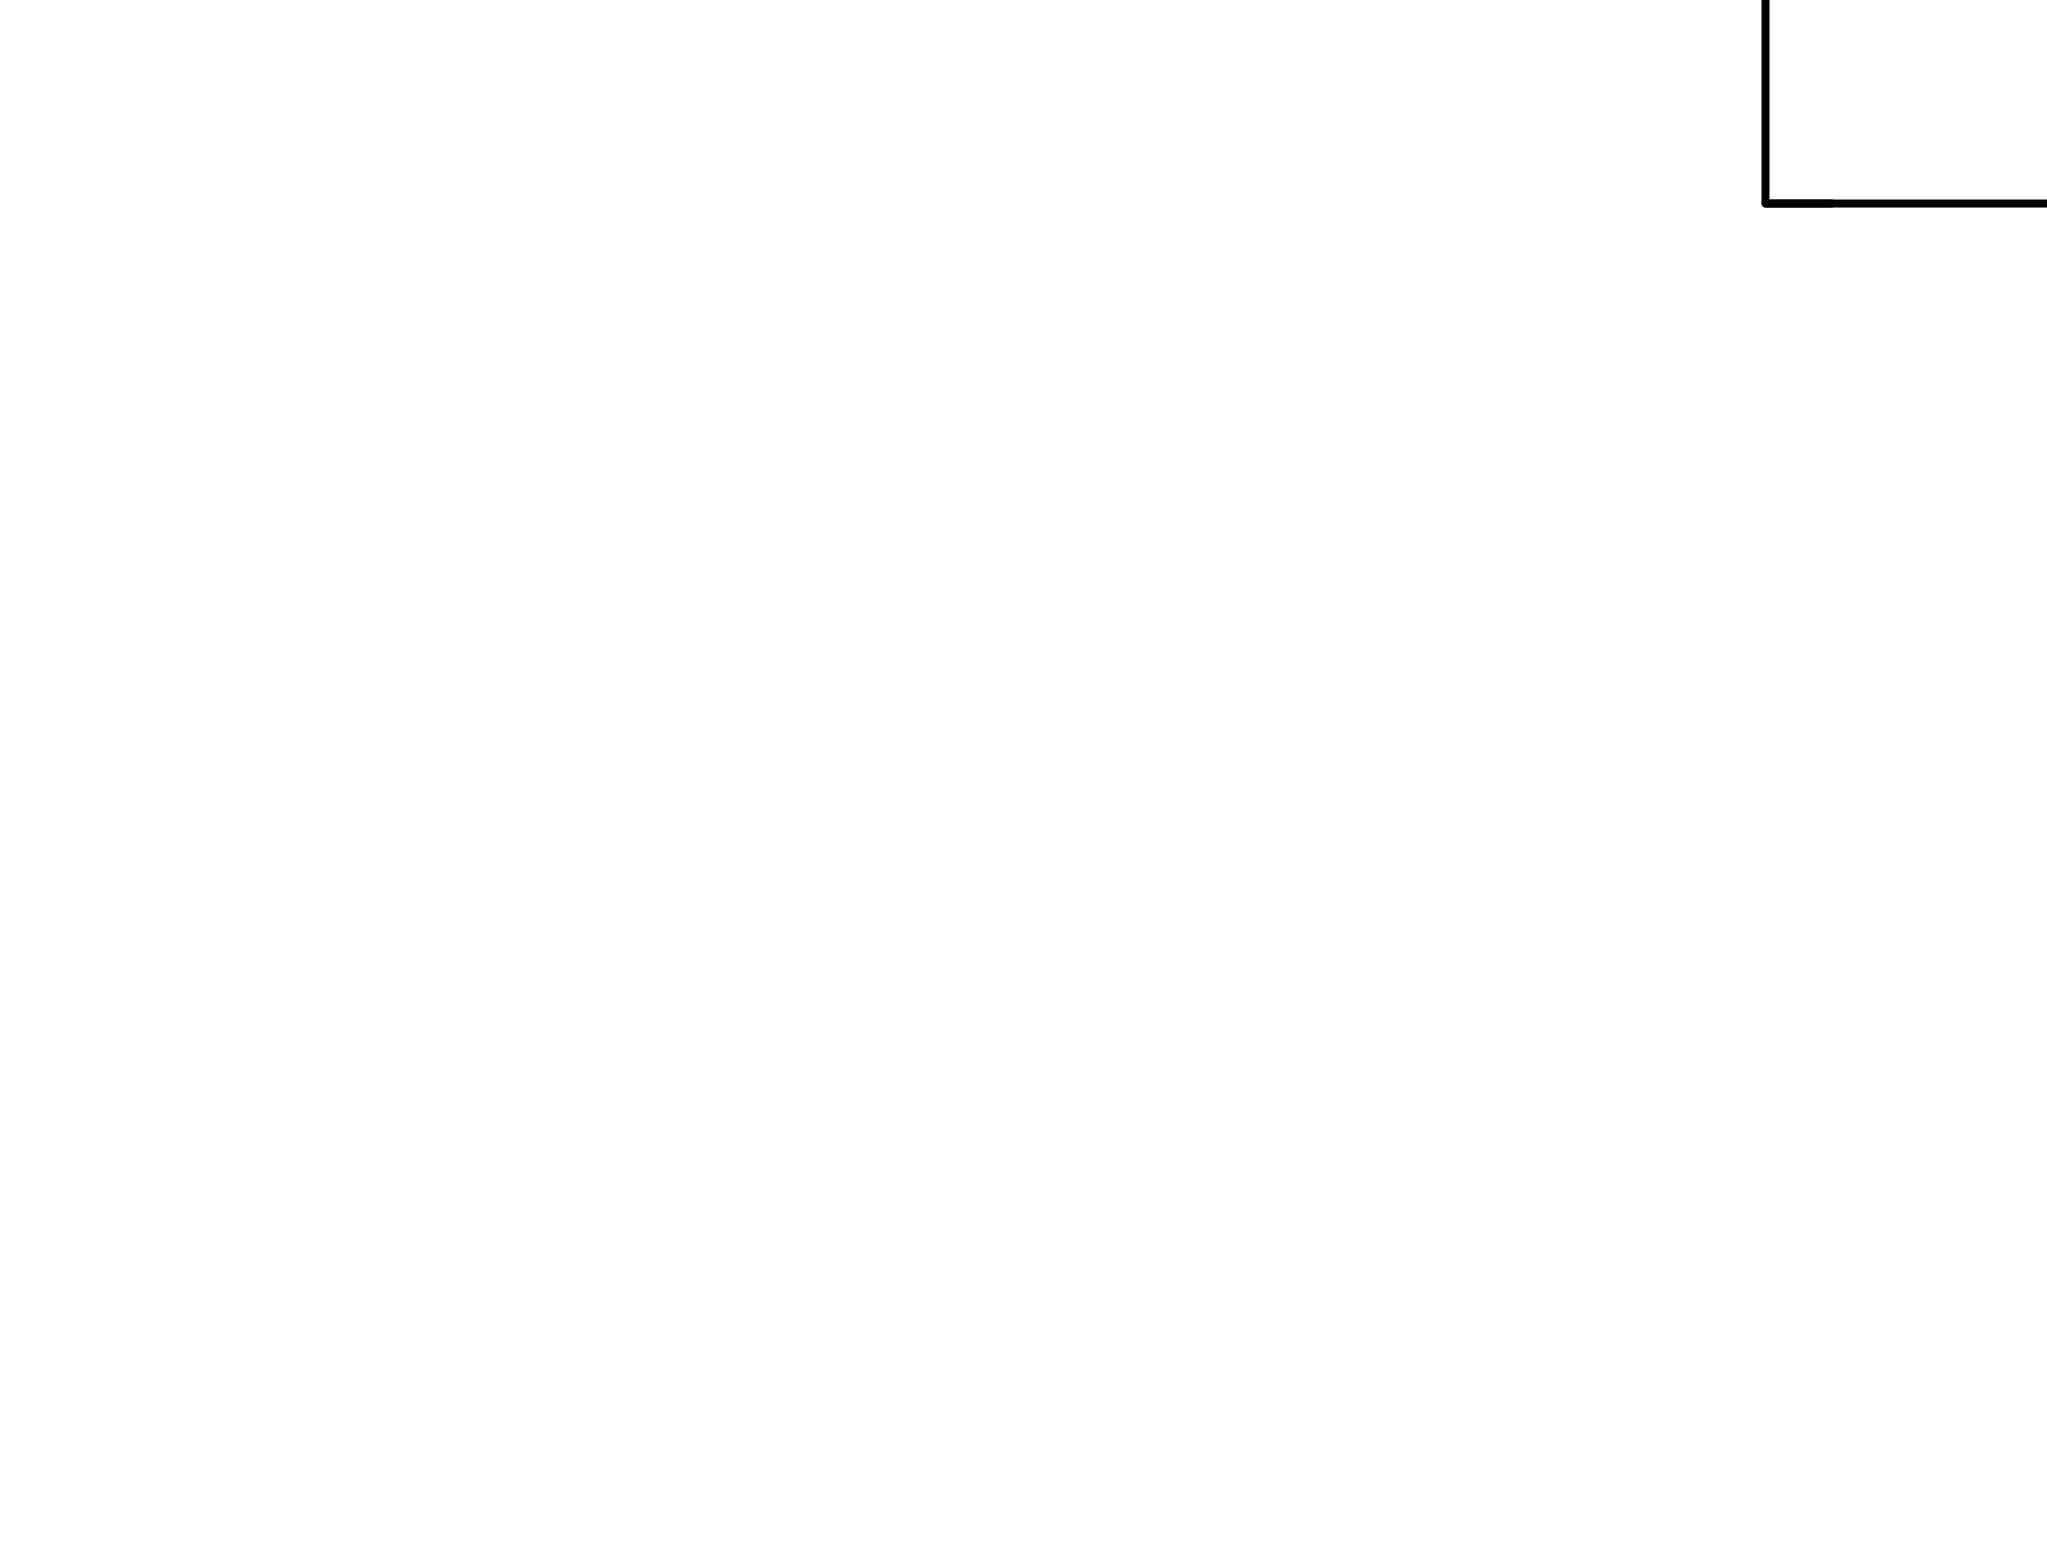

     6 channels (1-6) ignored in spectrum #     1
   614 channels (67-680) ignored in spectrum #     1



In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot.addCommand("Rescale X 0.1 15")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              6.092460e+07     using 60 bins.

Te

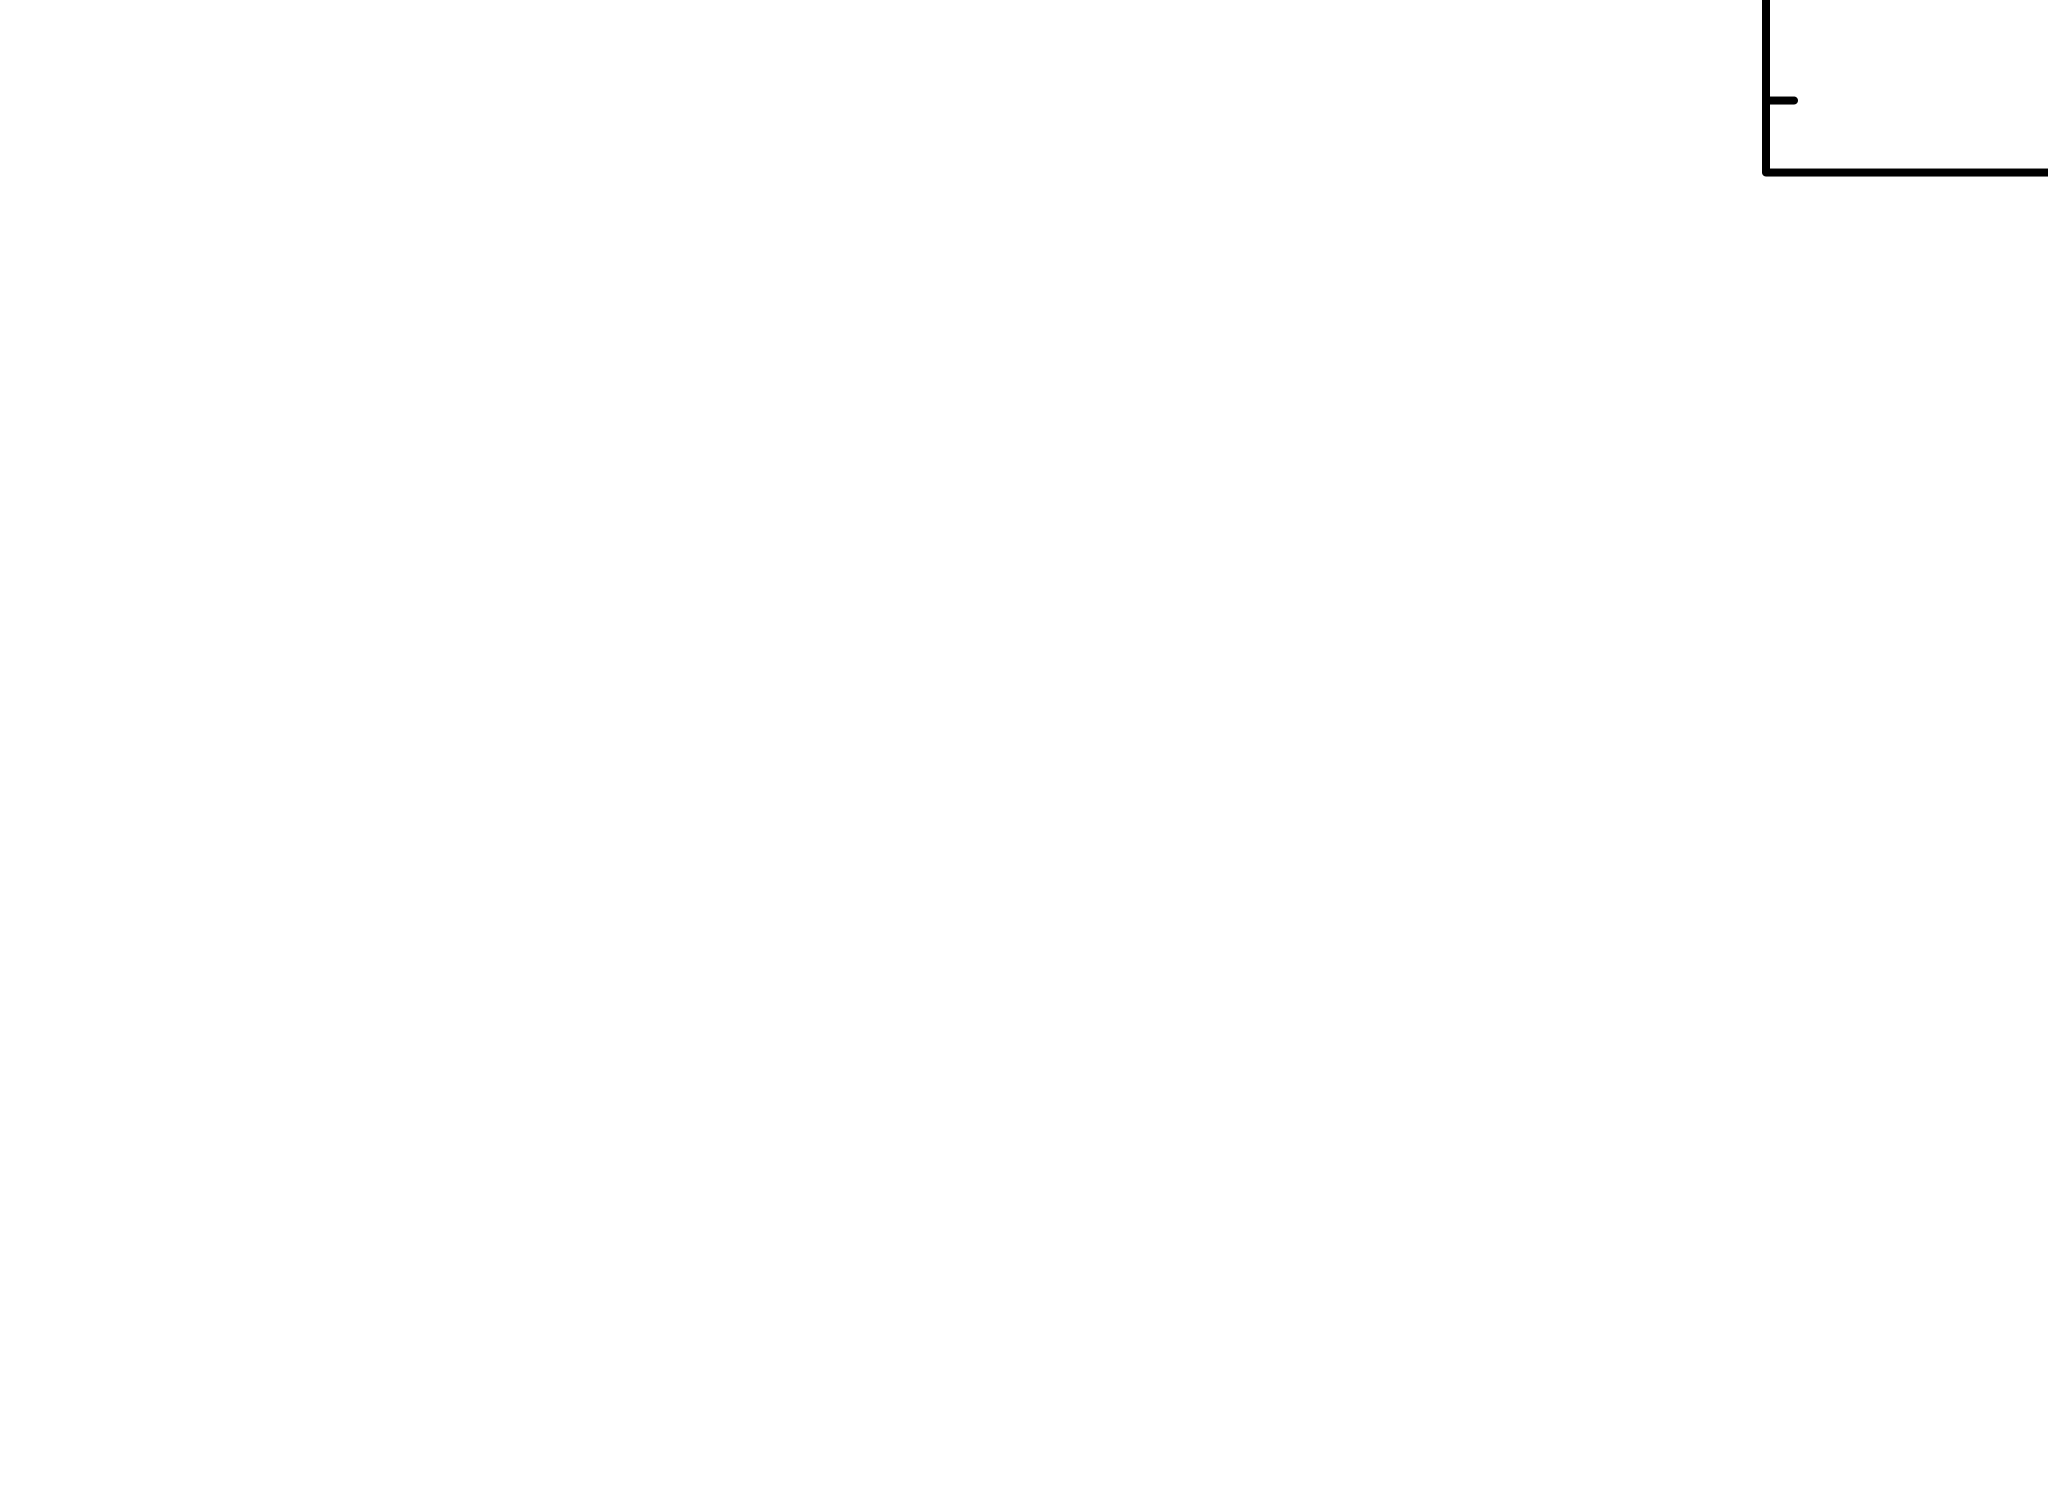

In [4]:
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

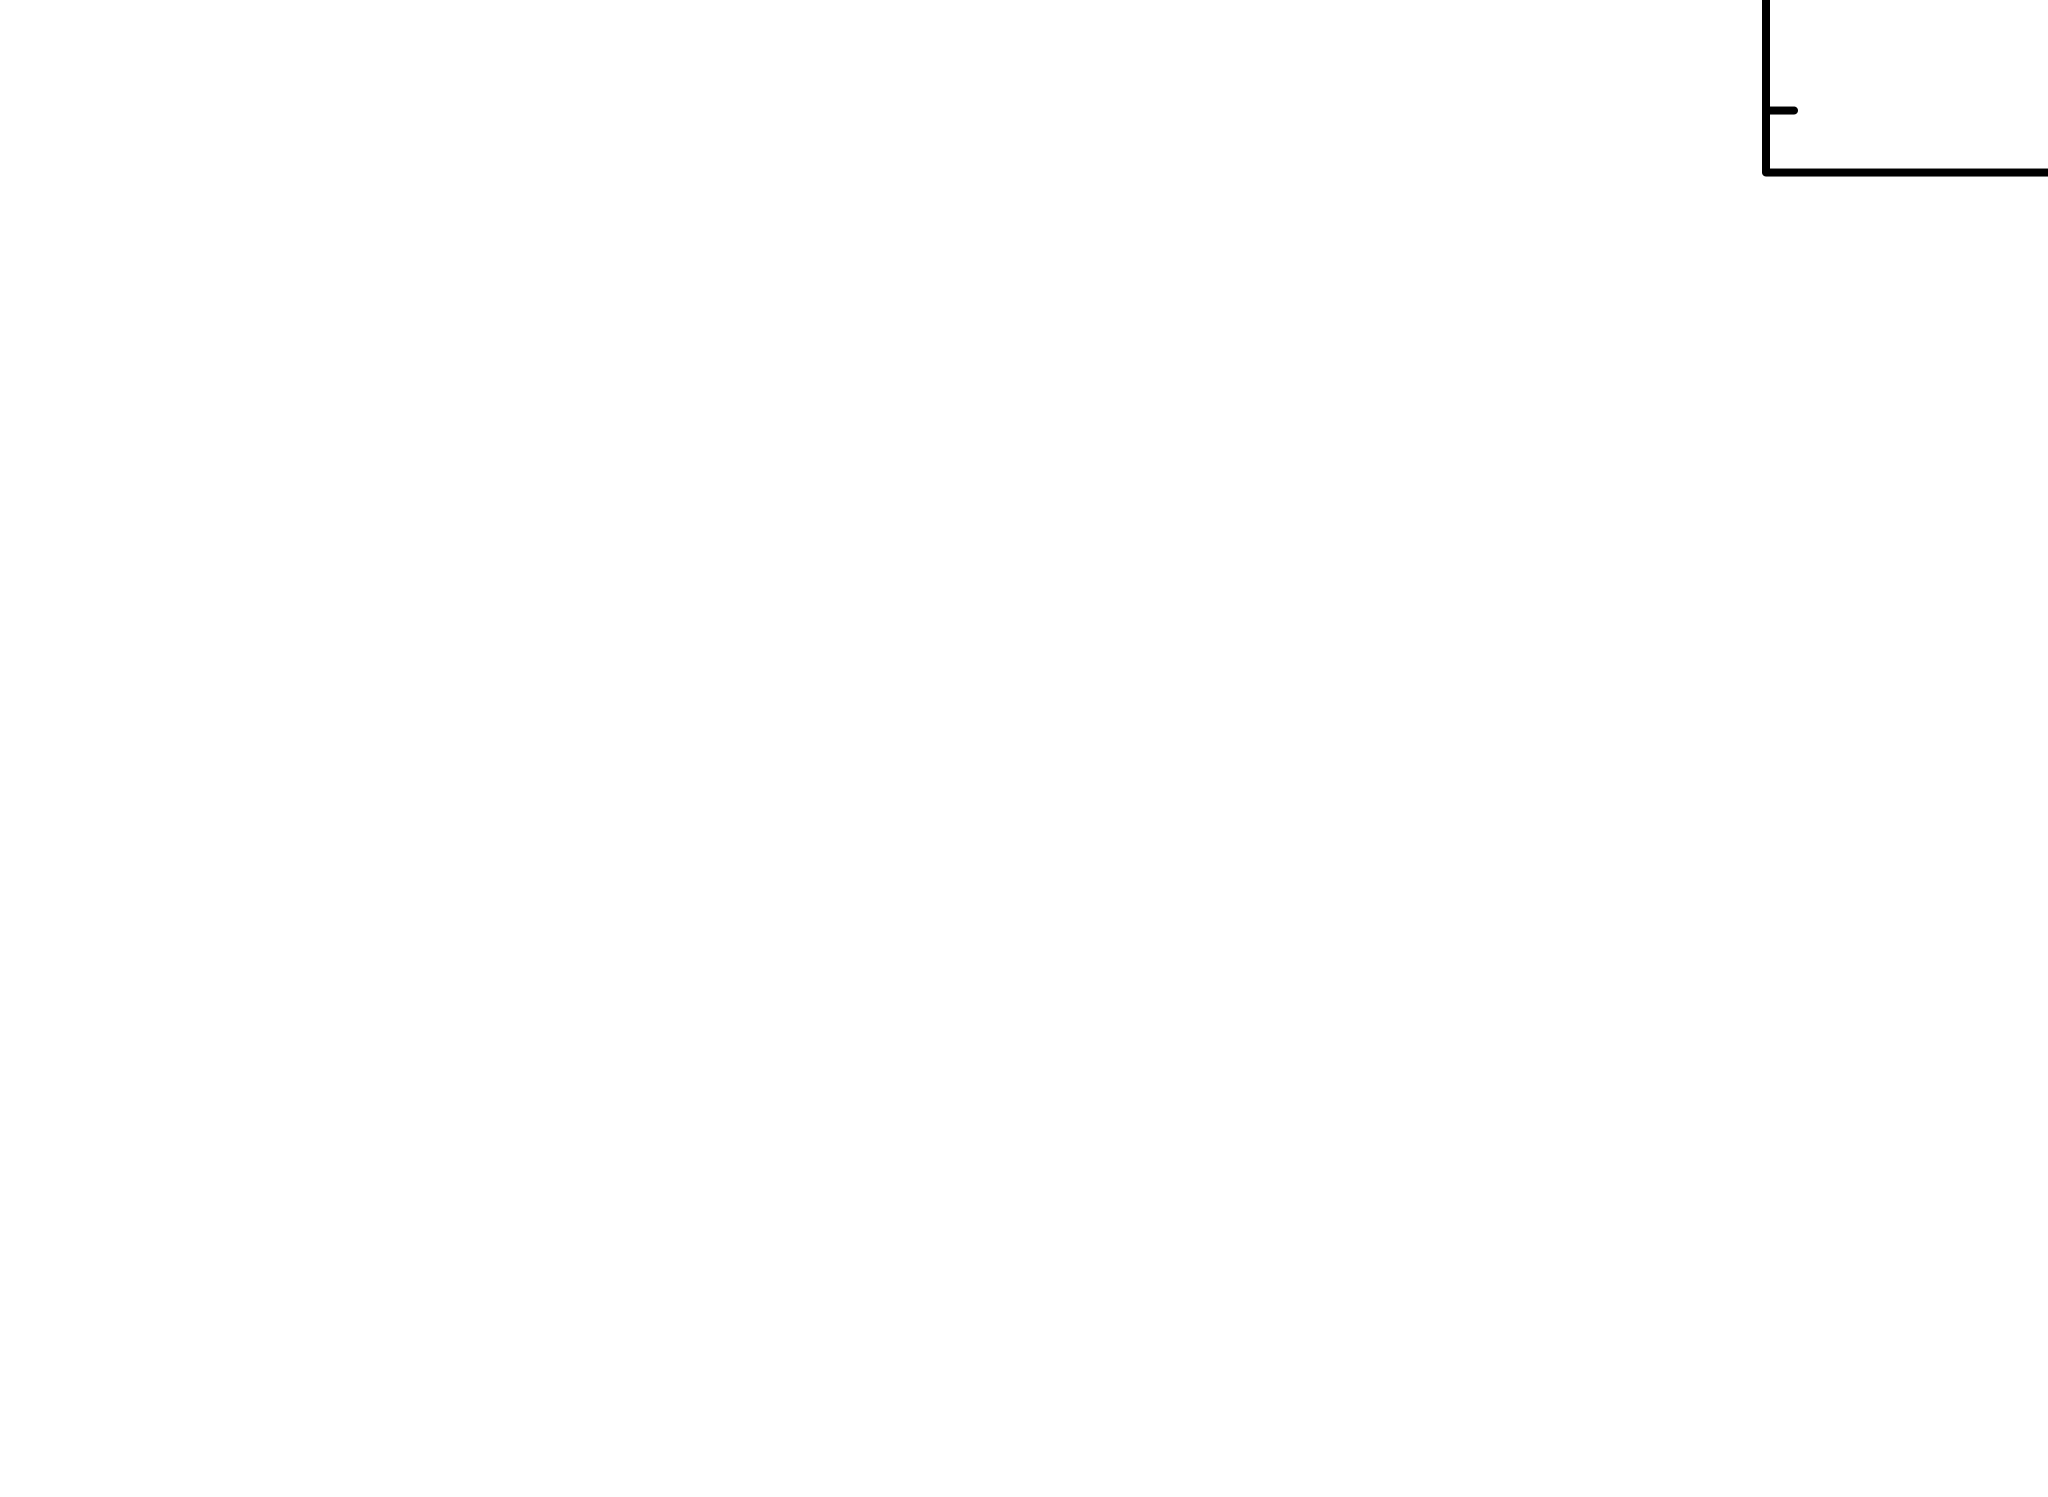


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              3.116622e+07     using 60 bins.

Test statistic : Chi-Squared              3.886614e+12     using 60 bins.
 Null hypothesis probability of 0.000000e+00 with 57 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
131.18       8.23758e+06   0       12479.9       7.47339      0.360334
131.179      1.3195e-38   27       4508.23     -0.499813   7.80974e+06
131.179      0.00032363   26       4508.23     -0.499813   7.80974e+0

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.193328e+07     using 60 bins.

Test statistic : Chi-Squared              6.307450e+11     using 60 bins.
 Null hypothesis probability of 0.000000e+00 with 57 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
4.32924e+06  2.21124e+06  -3      0.485007       194.177      0.423546
1.5731e+06   1.76875e+06  -1     0.0862050       199.018      0.101162
129.918      2.64222e+06  -1       554.925       199.257     0.0339076


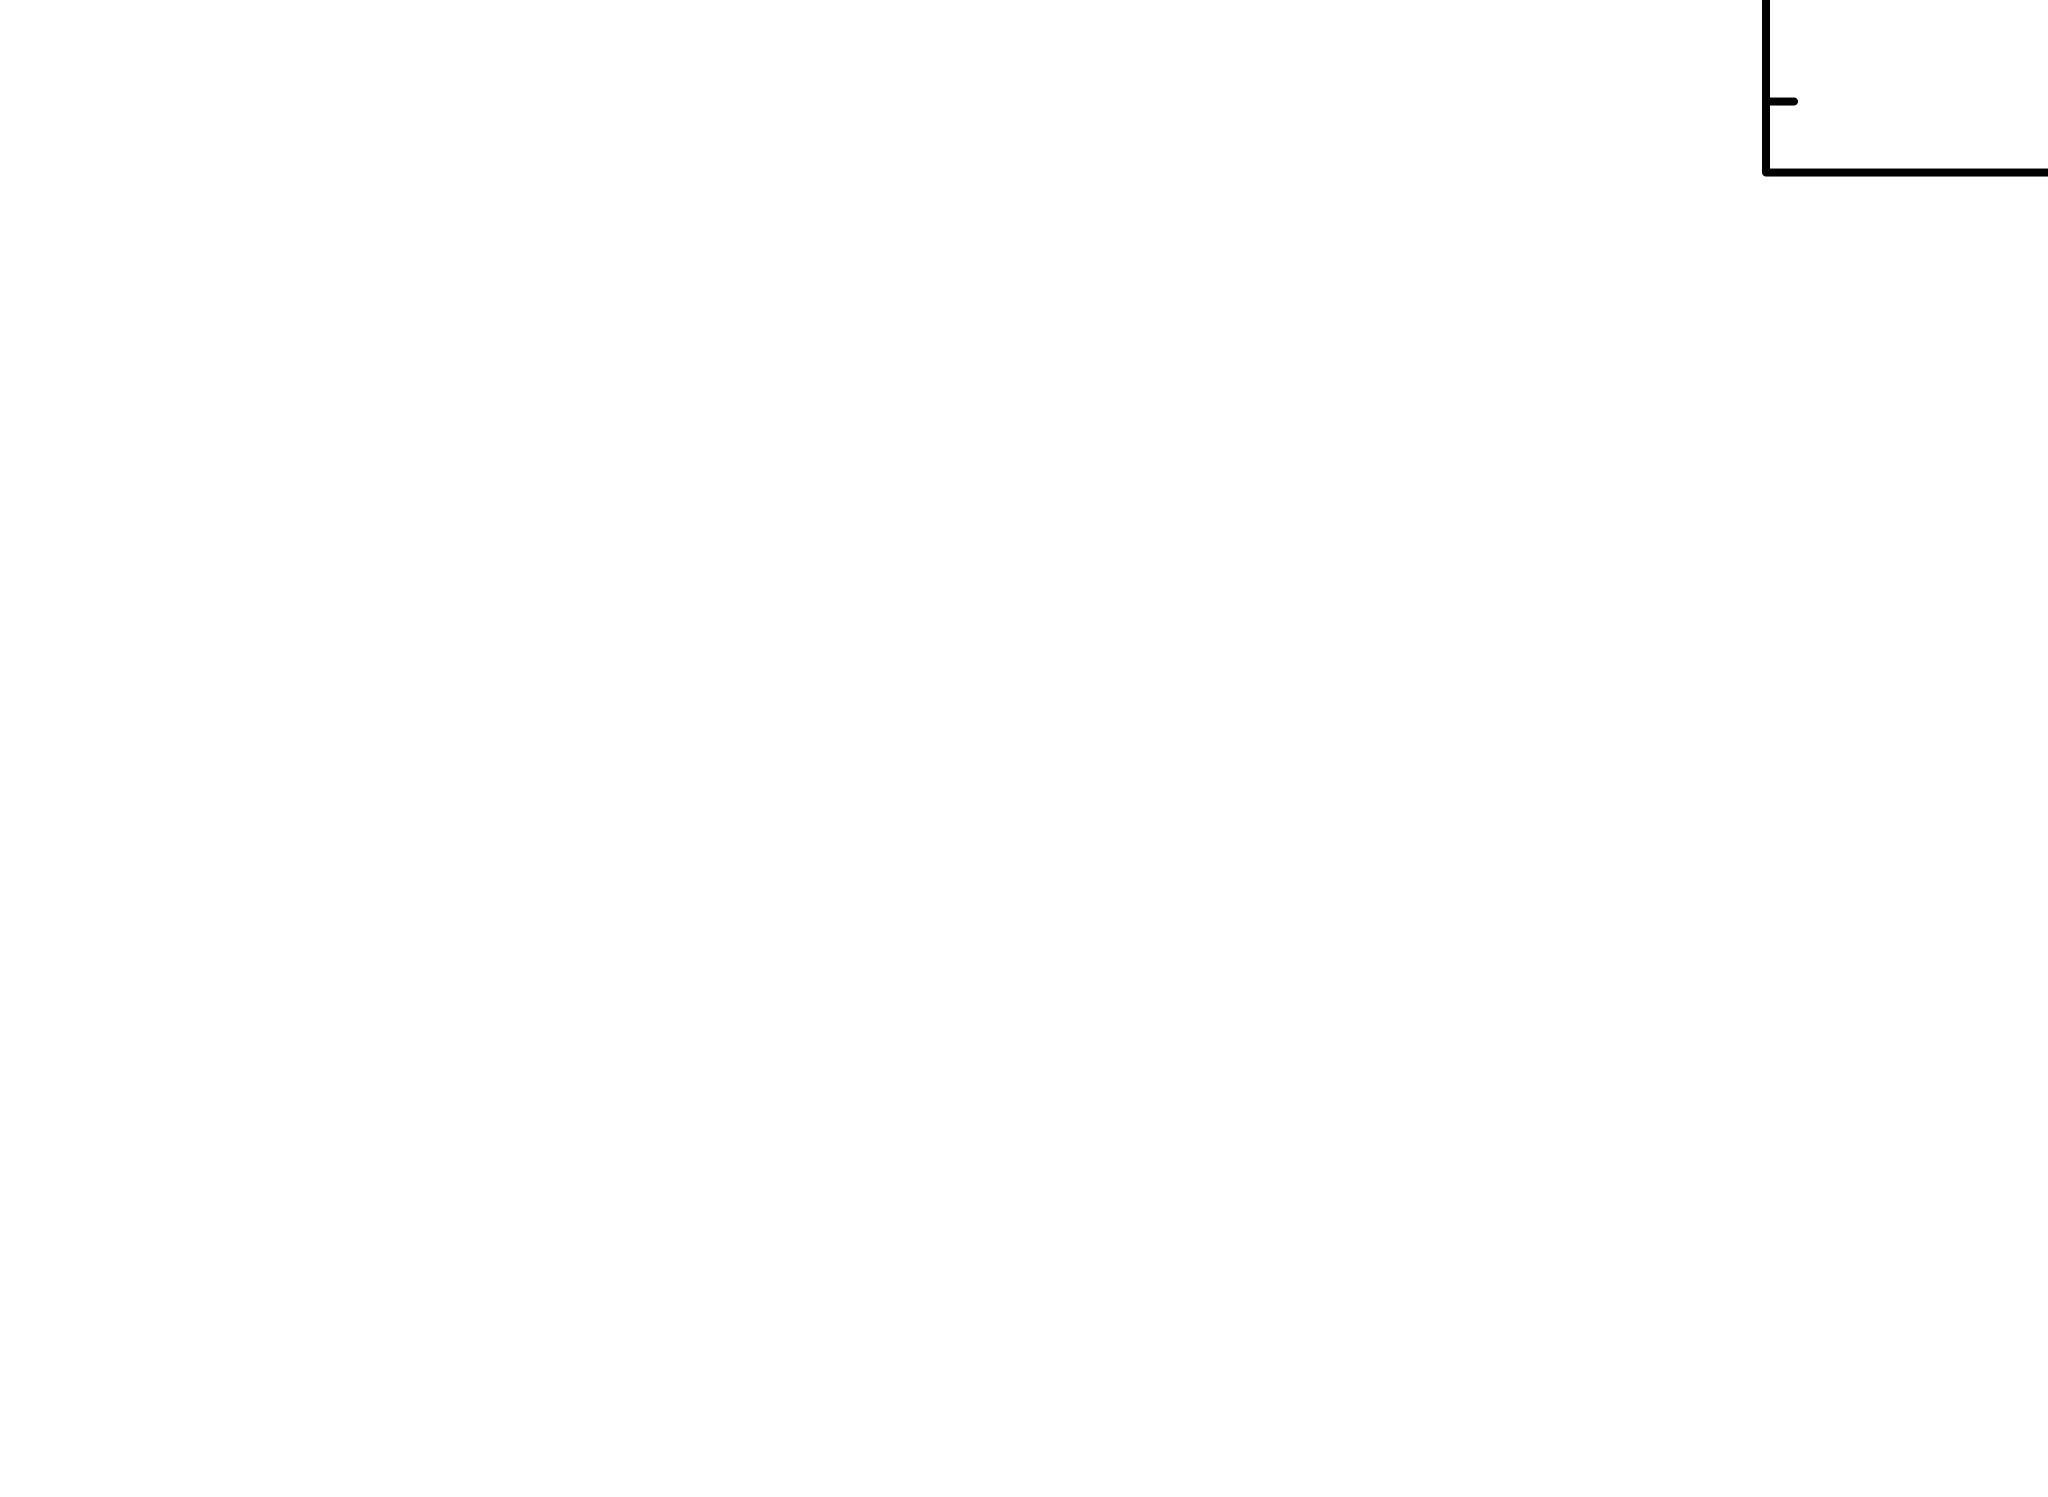

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic              4.503257e+06     using 60 bins.

Test statistic : Chi-Squared              4.659504e+11     using 60 bins.
 Null hypothesis probability of 0.000000e+00 with 57 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
131.18       1.35684e+06  -3       16404.2       42.4086   

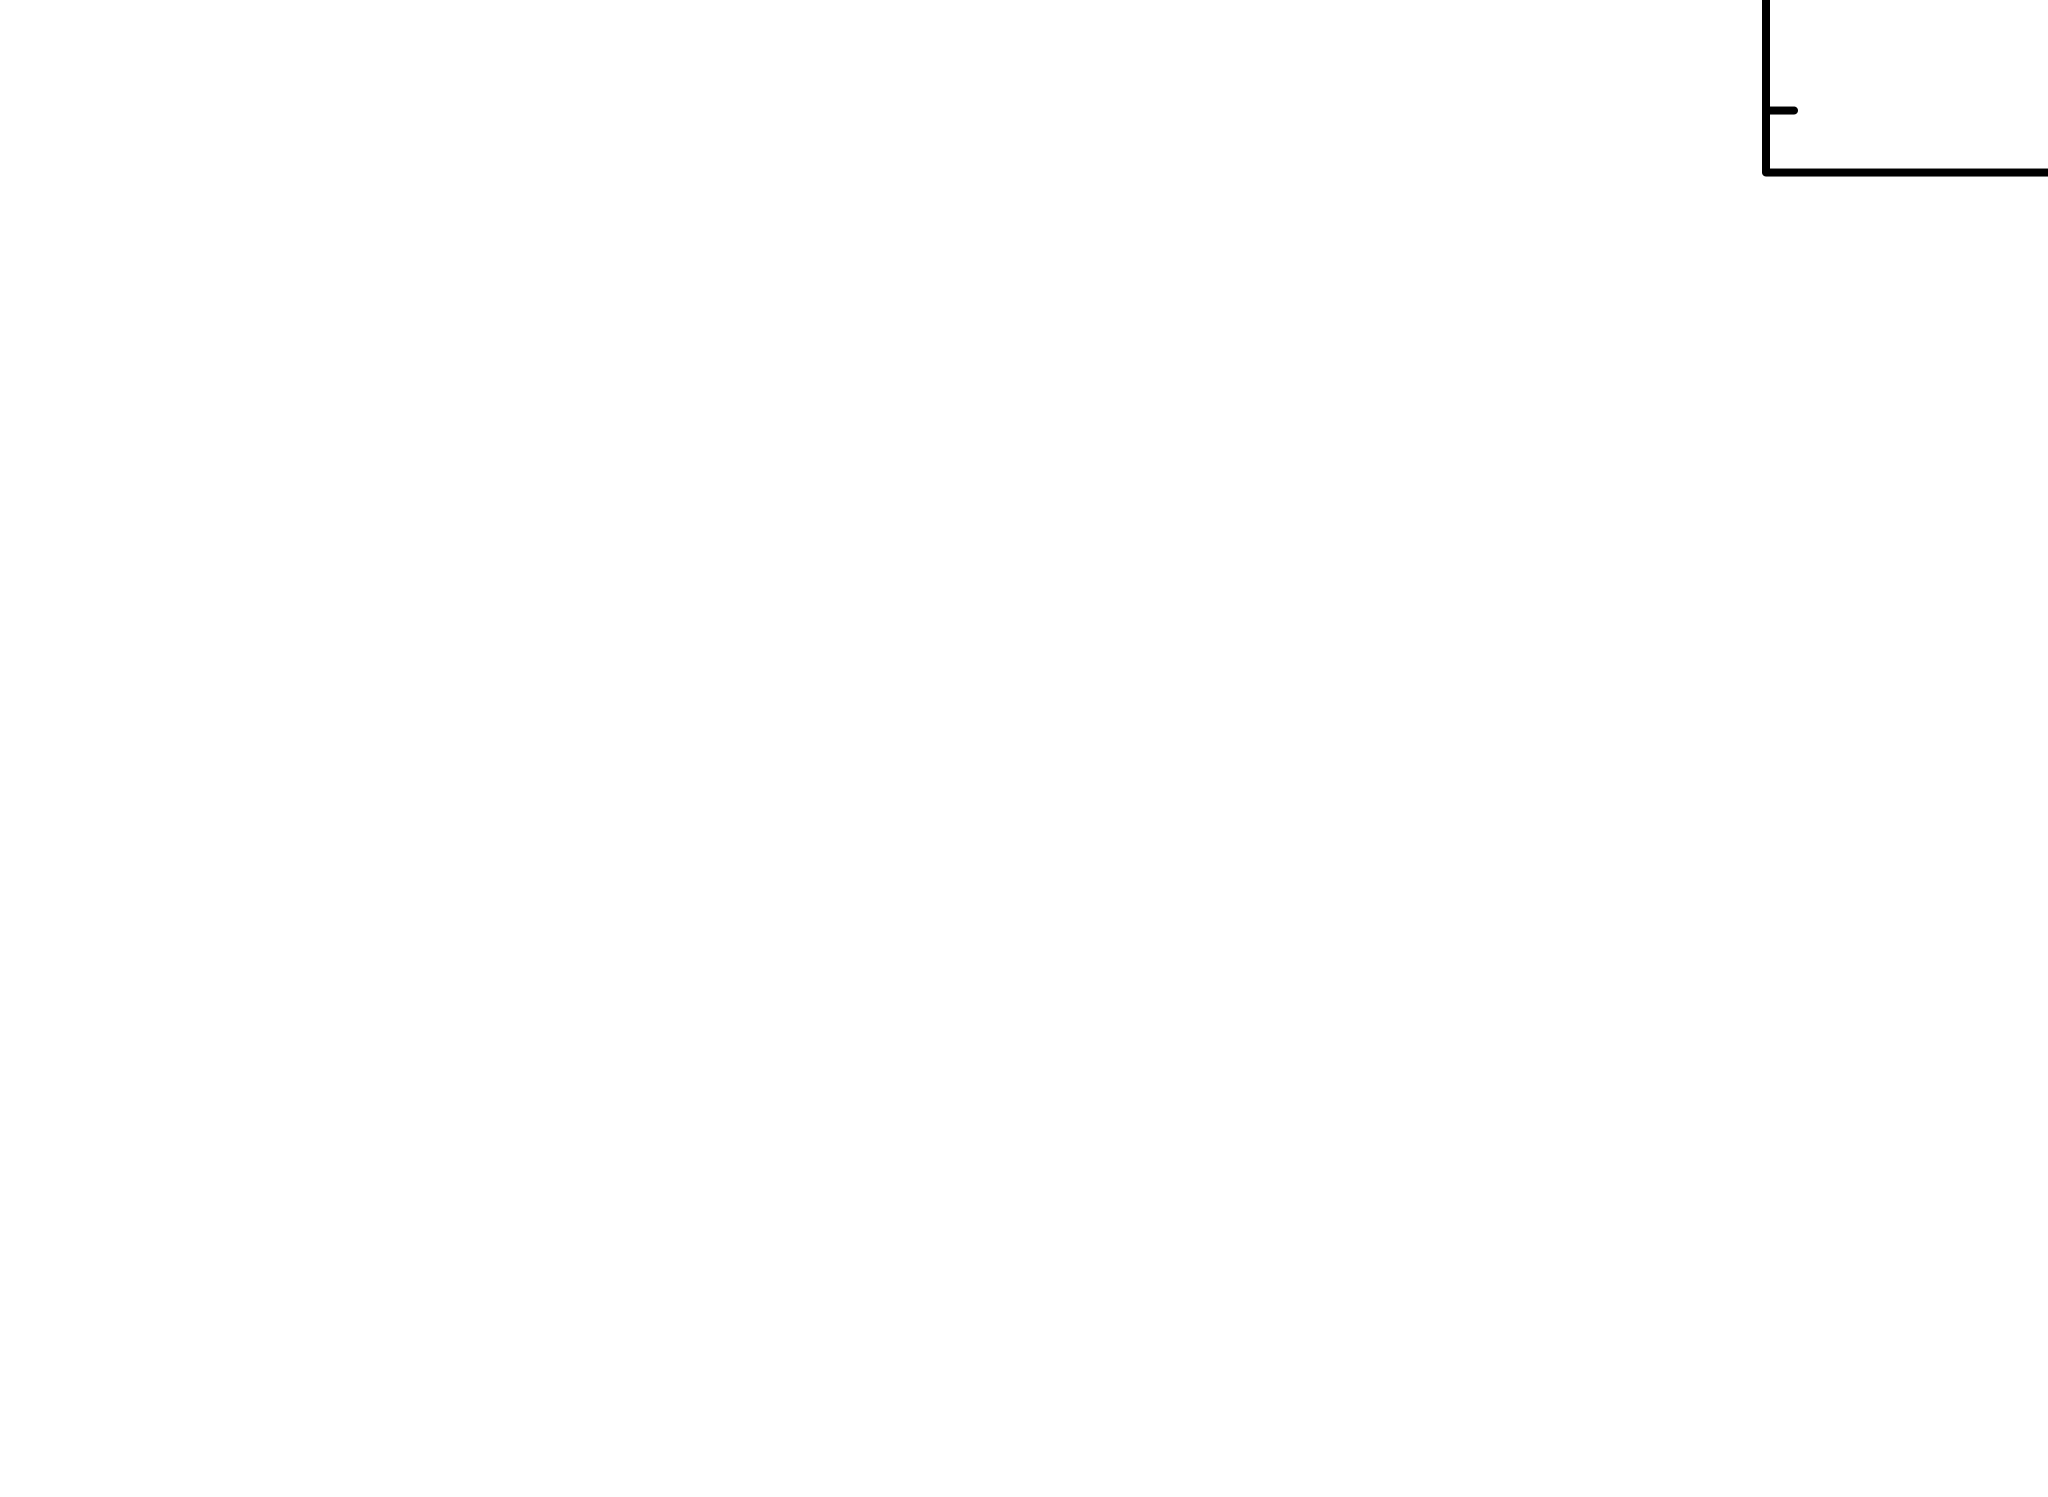

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.0884e-08 photons (2.0757e-16 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 0.2744
d_kpc = 1/plx
F_x = 1.6234*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.5789255831167283e+32


In [10]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

3.644314868804665
32.411438810417096


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.88)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.1727064101695894e-13
F_x / F_opt:  0.14123624256114856



Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              9.008418e+06     using 60 bins.

Test statistic : Chi-Squared              1.863798e+12     using 60 bins.
 Null hypothesis probability

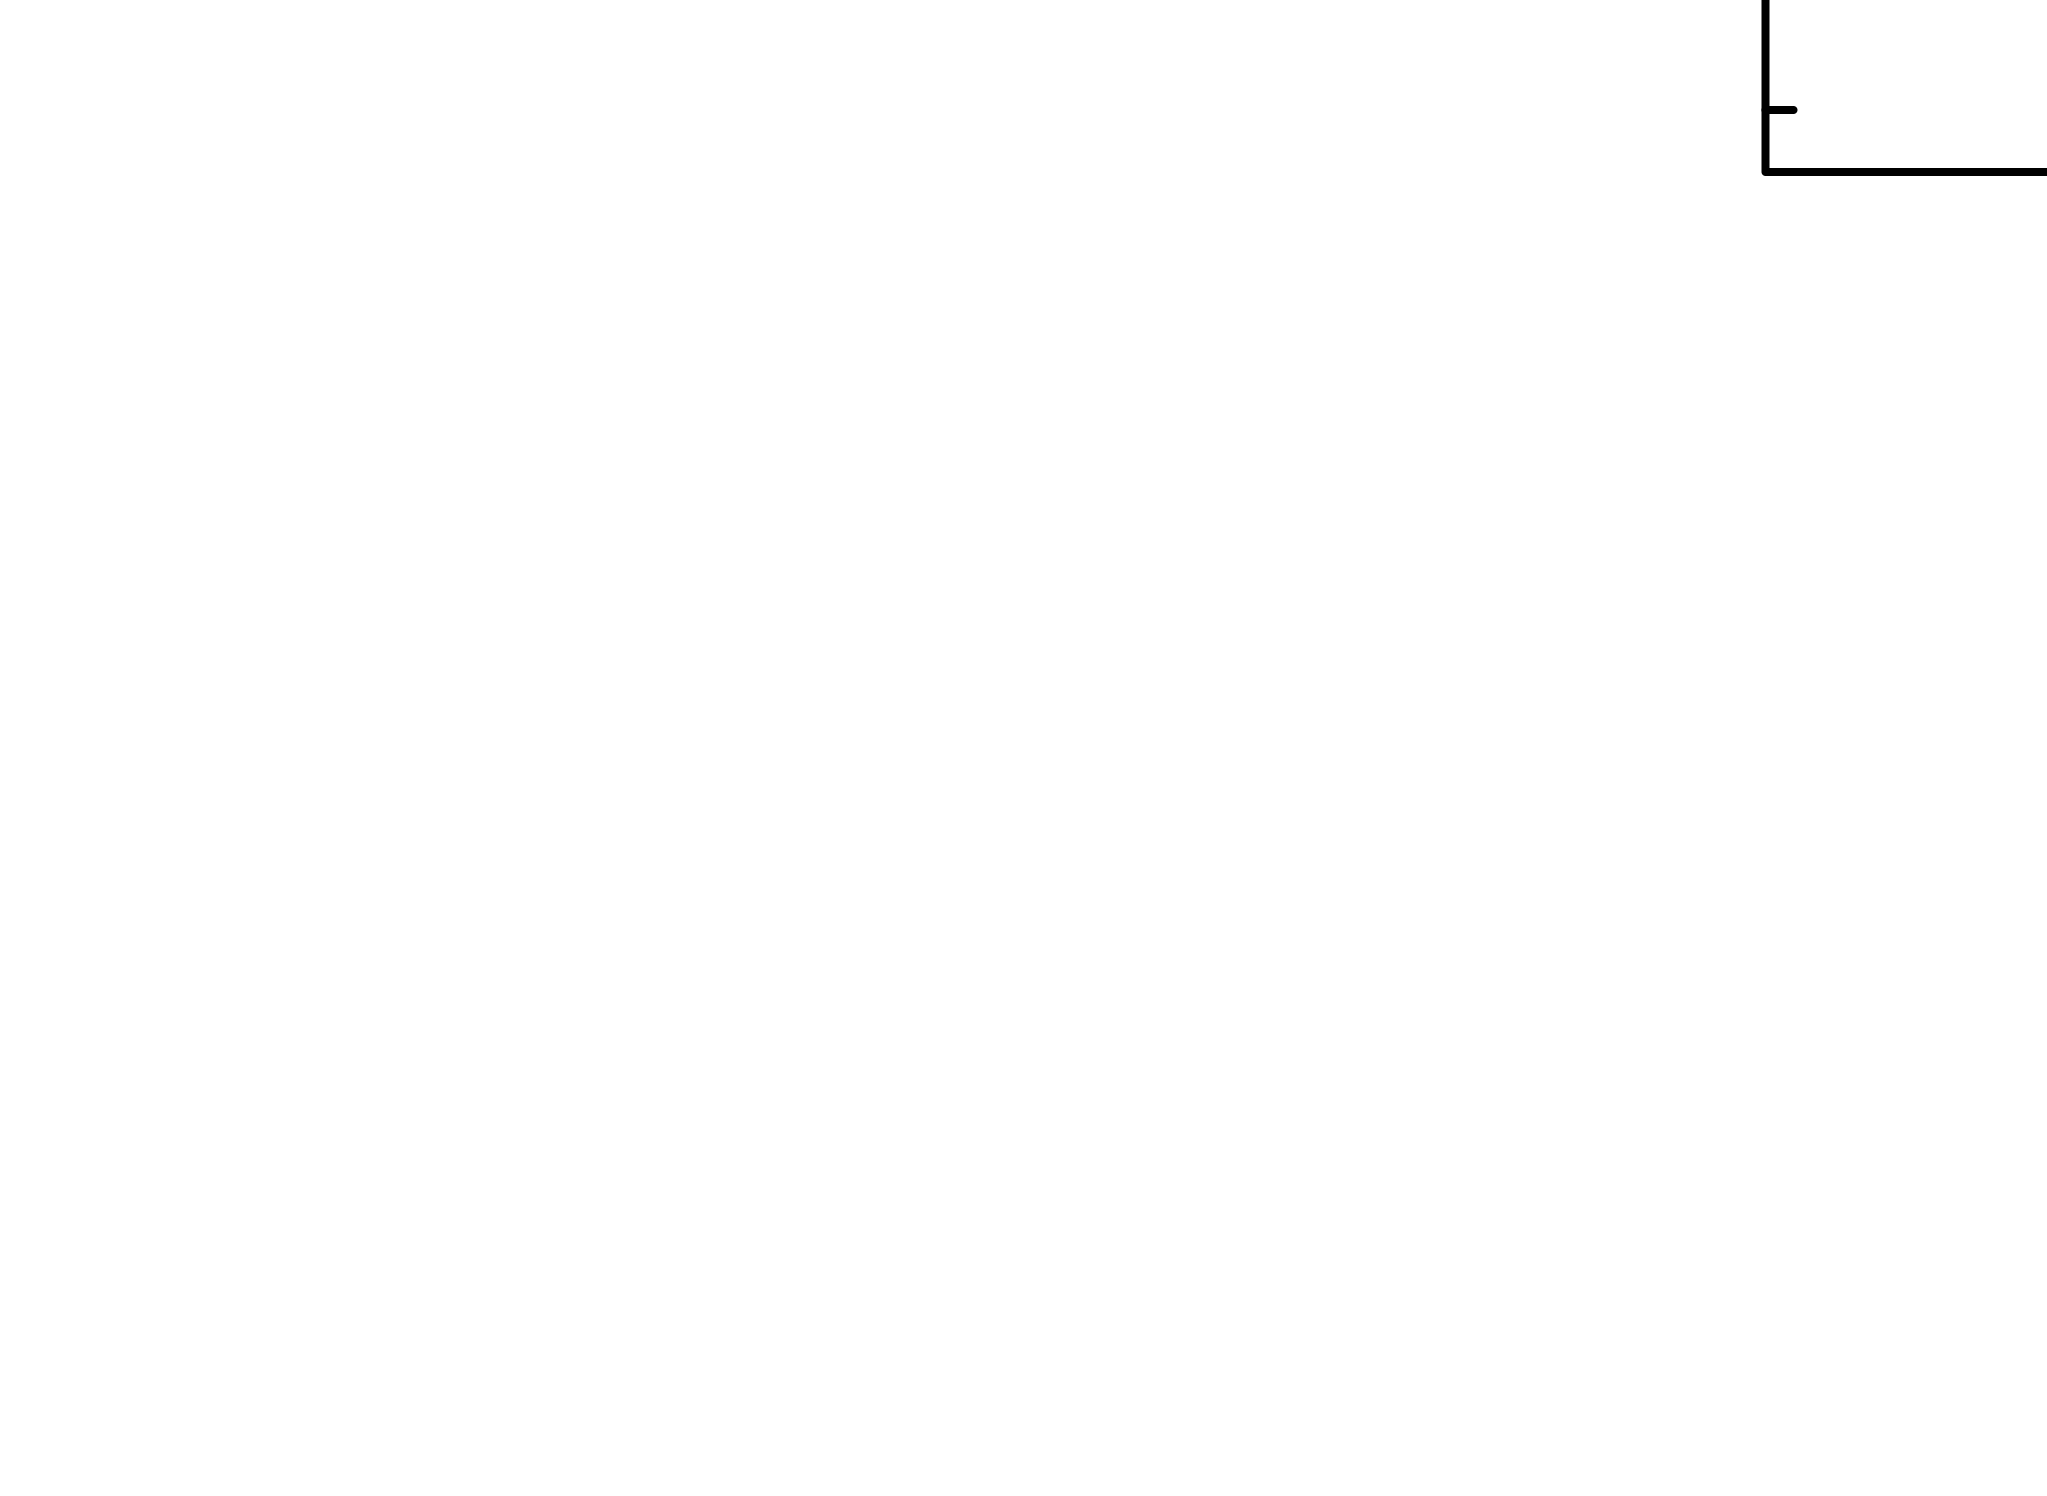

In [15]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 2.0
mo.apec.Abundanc = 0.3
mo.apec_3.kT = 16.0
mo.apec_3.Abundanc = 0.3
Fit.perform()
Plot("data resid")